# Setup

In [3]:
import numpy as np
import os
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Flatten, Activation, Conv2D, Dropout, BatchNormalization, MaxPool2D

from keras.callbacks import TensorBoard
from keras.optimizers import Adam

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers,regularizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import cv2
import shutil

Using TensorFlow backend.


# Path

In [4]:
train_path = 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/'
test_path = 'asl-alphabet/asl_alphabet_test/asl_alphabet_test/'

This quick way for me to label all my classes

In [5]:
CATEGORIES = []

for i in range(0,26):
    CATEGORIES.append(chr(ord('A') + i))

CATEGORIES.append('space')
CATEGORIES.append('nothing')
CATEGORIES.append('del')

# Preprocessing Data

In [6]:
generator = ImageDataGenerator(validation_split=0.2)
generator1 = ImageDataGenerator(validation_split=0.2)
train_batches = generator.flow_from_directory(train_path,
                                              target_size=(64,64),
                                              classes = CATEGORIES,
                                              color_mode='rgb',
                                              batch_size=30,
                                              subset='training')
valid_batches = generator1.flow_from_directory(train_path,
                                              target_size=(64,64),
                                              classes = CATEGORIES,
                                              color_mode='rgb',
                                              batch_size=10,
                                              subset= 'validation')


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [9]:
for name in os.listdir(test_path):
    cat, _ = name.split('_')
    os.remove('asl-alphabet/asl_alphabet_test/asl_alphabet_test/)
    os.makedirs(os.path.join(test_path,cat))
    

FileExistsError: [Errno 17] File exists: 'asl-alphabet/asl_alphabet_test/asl_alphabet_test/F'

In [52]:
images, labels = next(train_batches)


In [100]:
ls

A_test.jpg        G_test.jpg        M_test.jpg        U_test.jpg
B_test.jpg        H_test.jpg        N_test.jpg        V_test.jpg
C_test.jpg        I_test.jpg        O_test.jpg        W_test.jpg
D_test.jpg        J_test.jpg        P_test.jpg        X_test.jpg
E_test.jpg        K_test.jpg        Q_test.jpg        Y_test.jpg
F/                L/                R_test.jpg        Z_test.jpg
F_test.jpg        L_test.jpg        S_test.jpg        nothing_test.jpg
G/                M/                T_test.jpg        space_test.jpg


In [53]:
def plot_images(images):
    for i in range(5):
        plt.imshow((images[i]).astype(np.uint8))
        plt.title(CATEGORIES[int(np.where(labels[i] == 1)[0])])
        plt.show()

# Plotting Images

Can verify labels are correct with provided chart

In [54]:
%%html
<img src="RefImg.jpg" alt="ASL-Alphabet">

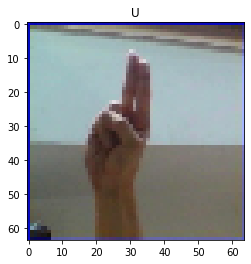

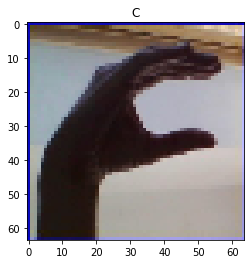

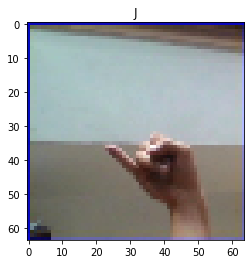

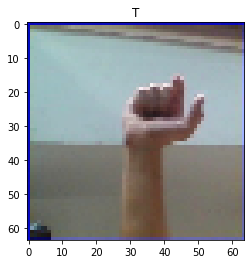

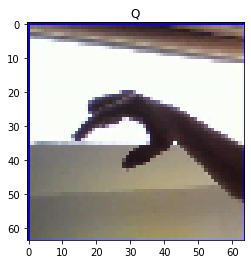

In [55]:
plot_images(images)

# Build Model

In [56]:
model = Sequential()
model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=(64,64,3)))
model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
#model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
#model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))

model.add(BatchNormalization())

model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dense(29, activation='softmax'))

In [57]:
model.compile(optimizer= 'sgd', loss= "categorical_crossentropy", metrics=['accuracy'])

In [59]:
model.fit_generator(train_batches,
                    steps_per_epoch=30,
                    validation_data=valid_batches,
                    validation_steps=10,
                    epochs=50,
                    verbose=2)

Epoch 1/50
 - 7s - loss: 3.8524 - accuracy: 0.1344 - val_loss: 4.4318 - val_accuracy: 0.0600
Epoch 2/50
 - 7s - loss: 3.7854 - accuracy: 0.1856 - val_loss: 4.6783 - val_accuracy: 0.0700
Epoch 3/50
 - 7s - loss: 3.7741 - accuracy: 0.1856 - val_loss: 3.6750 - val_accuracy: 0.0500
Epoch 4/50
 - 7s - loss: 3.7377 - accuracy: 0.2033 - val_loss: 4.4826 - val_accuracy: 0.0900
Epoch 5/50
 - 7s - loss: 3.7774 - accuracy: 0.1800 - val_loss: 6.3504 - val_accuracy: 0.0300
Epoch 6/50
 - 7s - loss: 3.7457 - accuracy: 0.1767 - val_loss: 5.8273 - val_accuracy: 0.0700
Epoch 7/50
 - 8s - loss: 3.7188 - accuracy: 0.1700 - val_loss: 4.4879 - val_accuracy: 0.0600
Epoch 8/50
 - 8s - loss: 3.7160 - accuracy: 0.1856 - val_loss: 4.4807 - val_accuracy: 0.0600
Epoch 9/50
 - 7s - loss: 3.6490 - accuracy: 0.2156 - val_loss: 4.5361 - val_accuracy: 0.0500
Epoch 10/50
 - 7s - loss: 3.5786 - accuracy: 0.2167 - val_loss: 4.7563 - val_accuracy: 0.0400
Epoch 11/50
 - 7s - loss: 3.6310 - accuracy: 0.1933 - val_loss: 4.601

vgg16_model = keras.applications.vgg16.VGG16()


In [ ]:
vgg16_model = keras.applications.vgg16.VGG16()


In [ ]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

# Modify Model


In [ ]:
#removing last layer and add mine

model.layers.pop()
model.add(Dense(29, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer= 'sgd', loss= "categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.fit_generator(train,
                    steps_per_epoch=30,
                    validation_data=valid,
                    validation_steps=10,
                    epochs=10,
                    verbose=2)

In [62]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [63]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [64]:
scores = model.evaluate(images, labels, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.33%
